# Exploring COVID-19 deaths Related data in Mecklenburg County<br>

#### Content:
<br>
0. Reading Data
1. Death Percentage by Age Bracket<br>
   1.1 Monthly Death Percentage By Age Bracket Chart
2. Death Count - All Ages  <br>
   2.1 Monthly Deaths - All Ages
3. Death Percentage - All Ages
4. New Cases
5. Deaths vs. New Cases
6. Deaths by Age Bracket <br>
   6.1 Total Deaths by Age Bracket <br>
   6.2 Deaths by Age Bracket Throughout Time <br>
   6.3 Monthly Deaths by Age Bracket <br>
7. Other Underlying Illness Conditions <br>
   7.1 Monthly Deaths With Underlying Illness Conditions vs Deaths Without <br>
   7.2 Total Death Percentage and Count With and Without Other Underlying Conditions
<br>

#### About the Data: 
Data set based on mecknc's data releases: [Mecklenburg County COVID-19 Data Releases](https://www.mecknc.gov/news/Pages/COVID-19-Data-Dashboard.aspx) <br>
** last updated: 01-10-2021

In [1]:
import os
import shutil
import datetime
from dateutil import relativedelta
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib import cm
%matplotlib inline

In [2]:
ROOT = Path("./")
DATA = ROOT/'data'
# [f for f in ROOT.iterdir()]
# [f for f in DATA.iterdir()]

In [3]:
print(ROOT)
print(DATA)

.
data


In [4]:
%ls {DATA}

 Volume in drive C has no label.
 Volume Serial Number is FCBC-A9FB

 Directory of C:\Users\laura\covid-19\covid-19_analysis_NC\data

01/08/2021  08:20 PM    <DIR>          .
01/08/2021  08:20 PM    <DIR>          ..
01/07/2021  10:10 PM        15,318,162 MECK_COVID_Cases_Restricted_Detailed_12312020.csv
01/15/2021  09:49 AM             8,371 weekly_covid19_report_mecknc.csv
               2 File(s)     15,326,533 bytes
               2 Dir(s)  282,276,753,408 bytes free


### 0. Reading Data
----

In [5]:
df = pd.read_csv(DATA/'weekly_covid19_report_mecknc.csv')
df.head()
# df.info()
# list(df.columns)

,date,cases_cum_count,new_0_19_pct,new_20_39_pct,new_40_59_pct,new_60_pct,new_0_19_count,not_hosp_pct,hosp_pct,under_invest_pct,...,hosp_40_59_pct,hosp_60_plus_pct,death_0_19_pct,death_20_39_pct,death_40_59_pct,death_60_plus_pct,death_0_19_cum_count,death_20_39_cum_count,death_40_59_cum_count,no_other_ill_cum_count
0,2020-03-22,80,1.2,48.8,32.5,17.5,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
1,2020-03-26,230,1.0,46.0,34.8,18.2,NaN,77.8,17.8,4.4,...,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
2,2020-03-28,303,0.7,41.3,34.0,24.1,NaN,75.2,21.2,3.6,...,17.0,53.0,NaN,NaN,NaN,NaN,0,0,0,0
3,2020-04-01,466,1.1,38.4,36.1,24.5,NaN,75.3,18.9,5.8,...,16.0,50.0,NaN,NaN,NaN,NaN,0,0,0,0
4,2020-04-04,650,1.7,34.9,35.8,24.5,11.0,74.5,19.7,5.8,...,16.0,48.0,NaN,NaN,NaN,NaN,0,0,0,0


In [6]:
## converting 'date' column to datetime format

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 25 columns):
date                      79 non-null datetime64[ns]
cases_cum_count           79 non-null int64
new_0_19_pct              79 non-null float64
new_20_39_pct             79 non-null float64
new_40_59_pct             79 non-null float64
new_60_pct                79 non-null float64
new_0_19_count            1 non-null float64
not_hosp_pct              11 non-null float64
hosp_pct                  11 non-null float64
under_invest_pct          11 non-null float64
death_cum_count           79 non-null int64
death_ltc_cum_count       18 non-null float64
death_pct                 79 non-null object
hosp_0_19_                12 non-null float64
hosp_20_36_pct            12 non-null float64
hosp_40_59_pct            12 non-null float64
hosp_60_plus_pct          12 non-null float64
death_0_19_pct            67 non-null float64
death_20_39_pct           67 non-null float64
death_40_59_pct       

In [7]:
pd.set_option('display.max_columns', None, 'max_rows', None)
df.tail()

,date,cases_cum_count,new_0_19_pct,new_20_39_pct,new_40_59_pct,new_60_pct,new_0_19_count,not_hosp_pct,hosp_pct,under_invest_pct,death_cum_count,death_ltc_cum_count,death_pct,hosp_0_19_,hosp_20_36_pct,hosp_40_59_pct,hosp_60_plus_pct,death_0_19_pct,death_20_39_pct,death_40_59_pct,death_60_plus_pct,death_0_19_cum_count,death_20_39_cum_count,death_40_59_cum_count,no_other_ill_cum_count
74,2020-12-20,56044,15.6,43.3,28.3,12.8,NaN,NaN,NaN,NaN,514,258.0,less than 1,NaN,NaN,NaN,NaN,0.0,2.3,23.4,74.2,0,7,67,8
75,2020-12-27,60337,15.4,43.1,28.4,13.1,NaN,NaN,NaN,NaN,552,272.0,less than 1,NaN,NaN,NaN,NaN,0.0,2.1,21.4,76.4,0,7,68,10
76,2021-01-03,65497,15.4,42.7,28.4,13.5,NaN,NaN,NaN,NaN,583,281.0,less than 1,NaN,NaN,NaN,NaN,0.0,2.0,21.2,76.8,0,7,72,13
77,2021-01-06,67623,15.4,42.6,28.4,13.6,NaN,NaN,NaN,NaN,606,291.0,less than 1,NaN,NaN,NaN,NaN,0.0,2.2,20.6,77.1,0,9,73,15
78,2021-01-10,71775,15.4,42.6,28.4,13.6,NaN,NaN,NaN,NaN,640,305.0,less than 1,NaN,NaN,NaN,NaN,0.0,2.4,20.9,76.7,0,10,79,16


<br><br><br>
### 1. Death Percentage by Age Bracket
---
Out of all COVID deaths, this is death percentage distributed among four different age brackets. <br>
<br>
- 0-19 age bracket (lightest blue) has remain the same (zero) since mecknc.gov started to post reports on its dashboard. No deaths for people 19 and younger have been reported in Mecklenburg county.
- Age bracket 20-39 (very light blue) trends up, and maintaint the in third place. 
- 40-59 age group (Carolina Blue), went up and peaked in April, then steady and slightly down. 
- 60+ age group (navy blue). Always the highest age bracket with covid deaths. But, the percentage has steadily going down <br>

In [8]:
## columns with death percentage by age bracket
df[["death_0_19_pct","death_20_39_pct",'death_40_59_pct','death_60_plus_pct']].tail()

,death_0_19_pct,death_20_39_pct,death_40_59_pct,death_60_plus_pct
74,0.0,2.3,23.4,74.2
75,0.0,2.1,21.4,76.4
76,0.0,2.0,21.2,76.8
77,0.0,2.2,20.6,77.1
78,0.0,2.4,20.9,76.7


In [9]:
## plot death percentage by age bracket (each row)

# df['date']
# pt_perc_death = df.plot(x="date", y=["death_0_19_pct","death_20_39_pct",'death_40_59_pct','death_60_plus_pct'], 
#                             figsize=(20,9), 
#                             kind='bar', 
#                             stacked=True, 
#                             cmap=cmap,
#                             title='COVID-19 Death Percentage By Age bracket')
# pt_perc_death.set_ylabel('Percent')
# pt_perc_death.grid(axis='y')
# pt_perc_death.set_xticklabels(df['date'].dt.date);

<br>
<br>
<br>

### 1.1 Monthly Death Percentage By Age Bracket Chart


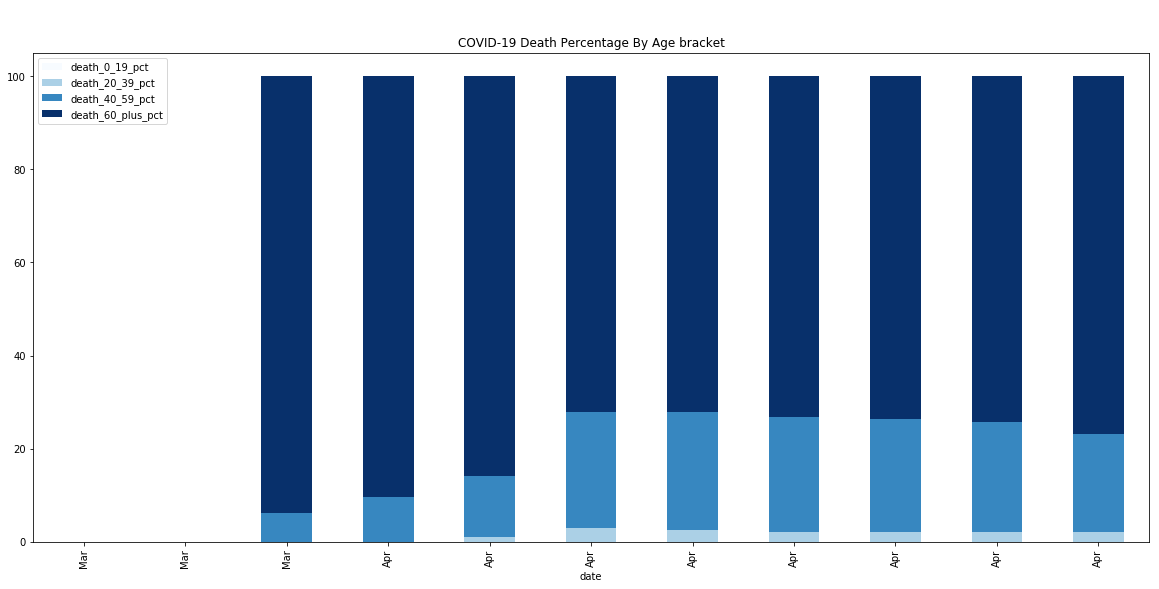

In [39]:
##*** TO DO: FIX XTICKLABELS***
##===============================##
## calculating and plotting  monthly Death percentage by age bracket 
## cmap for plot colors. Add '_r' to the end of the color to reverse palette
cmap = cm.get_cmap('Blues')
ax = df.resample('M', on='date').mean().reset_index().plot(x="date", y=["death_0_19_pct","death_20_39_pct",'death_40_59_pct','death_60_plus_pct'], 
                            figsize=(20,9), 
                            kind='bar', 
                            stacked=True, 
                            cmap=cmap,
                            title='\n\nCOVID-19 Death Percentage By Age bracket')
ax.set_xticklabels(df['date'].dt.strftime('%b'));
#reference to suppress text before plot in output: https://stackoverflow.com/questions/57165540/hide-text-before-seaborn-barplot/57165673

<br><br><br>
### 2. Death Count - All Ages
---

In [11]:
## Creating and calculating 'death_count' column...
## ...from 'death_cum_count'. Converting new column data type to integer.

df['death_count'] = pd.Series(df['death_cum_count'].values).diff(periods=1).fillna(0).astype(int)

df[['date','death_cum_count', 'death_count']].tail()

## another way to get death count?
# diff_kernel
# df['death_count'] = np.convolve(df['death_cum_count'], diff_kernel, 'same')

,date,death_cum_count,death_count
74,2020-12-20,514,12
75,2020-12-27,552,38
76,2021-01-03,583,31
77,2021-01-06,606,23
78,2021-01-10,640,34


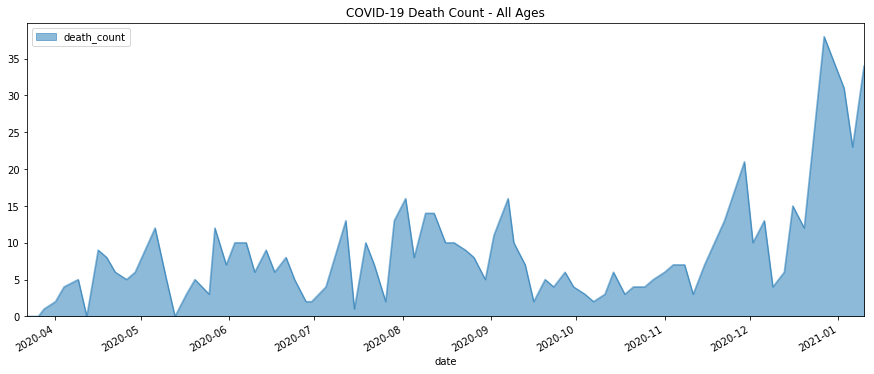

In [12]:
## Plotting 'death_count'
ax_death_count = df.plot.area(x='date', 
               y='death_count', 
               figsize=(15,6), 
               stacked=False,
               title='COVID-19 Death Count - All Ages')

##***** NEED TO ADD TREND LINE *****

#### COVID-19 Death Count - All Ages Chart
The highest COVID-19 death numbers were reported in the December 27, with a count of 38.<br>
As we can see in this chart the COVID-19 death number has been going up and down from the very beginning. <br>
<br><br>

### 2.1 Monthly Death County - All Ages

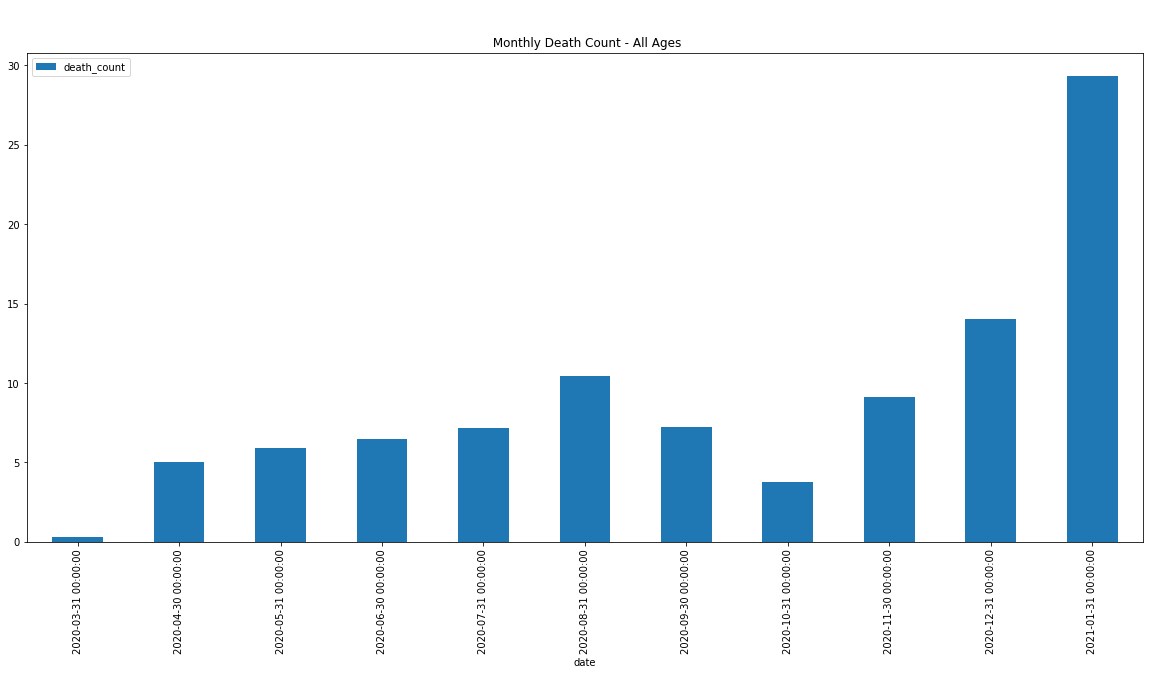

In [13]:
## Plotting monthly Death Count - All Ages
ax= df.resample('M', on='date').mean().reset_index().plot(x='date', y='death_count', 
                                                                figsize=(20,9),
                                                                kind='bar',
                                                                title='\n\n Monthly Death Count - All Ages')

# ax.set_xticklabels(df['date'].dt.strftime('%Y-%m'));

<br>
<br>

### 3. Death Percentage - All Ages
---


Total Death percentage compared with total cases

At its highest point, at the begining of May, Out of all the COVID-19 cases, a little over 3% have died with the virus in Mecklenburg county. After that, the percentage rate has been consistently going down achieving less than 1% at the end of December.

In [14]:
## Calculating Death Percentage per row (all ages)
## Created this calumn b/c starting Dec. 16,
## 'death_pct' is reported as less than one percent "<1.0% of cases"
df['cal_death_pct'] = ((df['death_cum_count'] * 100) / df['cases_cum_count']).round(1)
df[['date','death_cum_count', 'death_pct', 'cal_death_pct']].head()

,date,death_cum_count,death_pct,cal_death_pct
0,2020-03-22,0,0,0.0
1,2020-03-26,0,0,0.0
2,2020-03-28,1,0.3,0.3
3,2020-04-01,3,0.6,0.6
4,2020-04-04,7,1.1,1.1


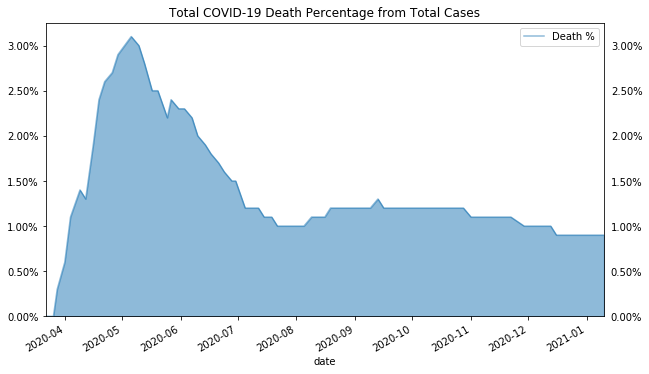

In [15]:
## Plotting cal_death_pct
pt_cal_death_pct = df.plot.area(x='date', 
                                  y='cal_death_pct', 
                                  figsize=(10,6), 
                                  stacked=False,
                                  title='Total COVID-19 Death Percentage from Total Cases')
pt_cal_death_pct.tick_params(labelright=True)
pt_cal_death_pct.yaxis.set_major_formatter(mtick.PercentFormatter())
pt_cal_death_pct.legend(['Death %']);

#### "Total COVID-19 Death Percentage from Total Cases" Chart
The percentage of people who died due to COVID-19 out of all people who tested positive to this virus, reached its peak in around the end of April of 2020. Since then, the percentage has steadily been going down. As of the last report dated December 27, the death percentage rate is less than 1%. In other words, currenlty Less than 1% of all people who tested positive to COVID-19 have died.
<br><br><br>

### 4. New Cases
---

We can observe stable numbers throughout the year, except in three different points, which coincide with three major holidays, Independence Day, Thanksgiving, and Christmas. It would be interesting to compare new cases numbers with testing numbers, and see the relation (if any) between the two of them.



In [16]:
## calculating new case count
df['new_case_count'] = pd.Series(df['cases_cum_count'].values).diff(periods=1).fillna(0).astype(int).replace(0, 80)
# df['death_20_39_count'] = pd.Series(df['death_20_39_cum_count'].values).diff(periods=1).fillna(0).astype(int)
df[['cases_cum_count', 'new_case_count', 'death_count']].tail()

,cases_cum_count,new_case_count,death_count
74,56044,2850,12
75,60337,4293,38
76,65497,5160,31
77,67623,2126,23
78,71775,4152,34


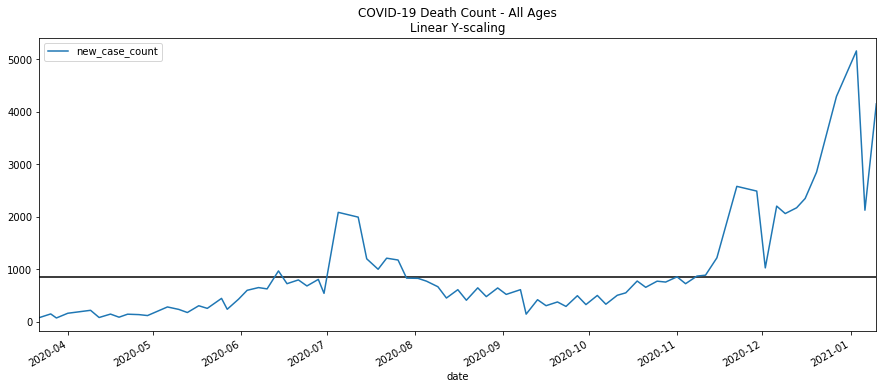

In [17]:
## Plotting 'death_count''
df.plot(x='date', 
                    y=['new_case_count'], 
                    figsize=(15,6),
                    title='COVID-19 Death Count - All Ages\nLinear Y-scaling')
plt.hlines(y=844.5,xmin=df["date"].min(),xmax=df["date"].max())

The black line marks the 75 percentile. This means that 75% of all the people who has tested positive to the virus, are below the 1,000 count at each specific point of time.

<br><br>

### 5. Death Count vs New Case Count
----
In these two charts we see a contrast of total new cases (orange) vs total death (blue). <br>
<br>
Although we see increases in the number of people who tested positive to the virus, we don't see a significant increase (at least not in the same magnitude) in the number of people who have died with this virus. The deaths count line (blue) remains low in comparison to the orange line.<br>
The black line denotes the 75 percentile. 75% of the cases are under the 1000 count<br>
<br>
To take a closer look, we magnify the view (second chart) to see the details and differences. Each tick in the "y"axis has a different scale, so we can magnify the differences and similarities. <br>
From this chart we can see that when the number of cases goes up, the number of deaths also goes up, but the magnitud of this changes is very low. <br>

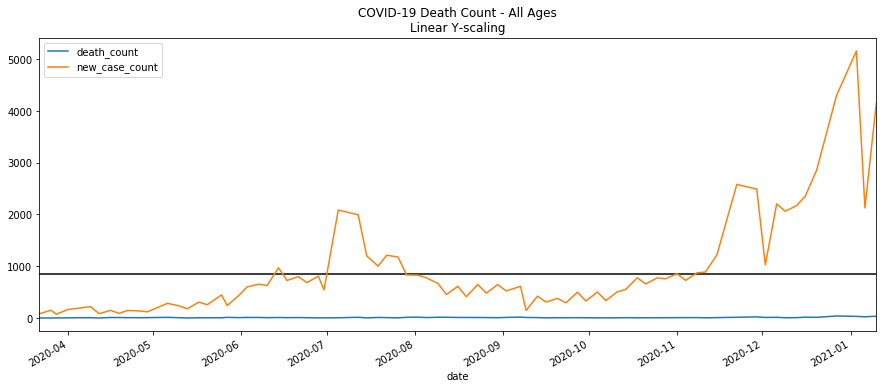

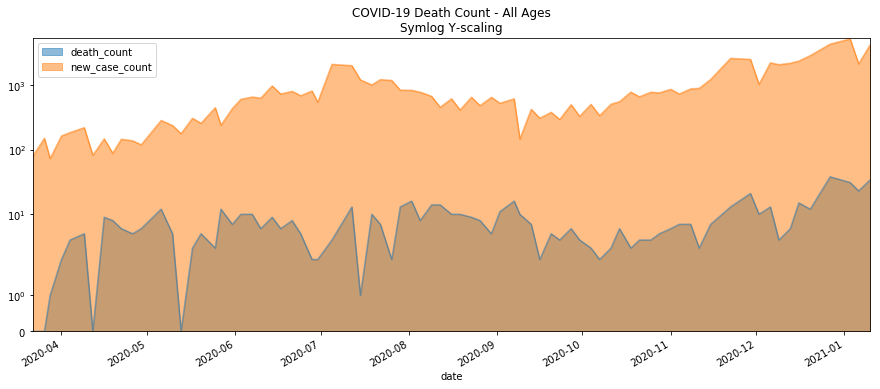

In [18]:
## Plotting 'death_count' vs 'new_case_count'
df.plot(x='date', 
                    y=['death_count', 'new_case_count'], 
                    figsize=(15,6),
                    title='COVID-19 Death Count - All Ages\nLinear Y-scaling')
plt.hlines(y=844.5,xmin=df["date"].min(),xmax=df["date"].max())
plt.yscale("linear")
df.plot.area(x='date', 
               y=['death_count', 'new_case_count'], 
               figsize=(15,6), 
                    stacked=False,
               title='COVID-19 Death Count - All Ages\nSymlog Y-scaling')
plt.yscale("symlog")

## *****EDIT Y AXIS TICKS OF SYMLOG CHART FOR CLEAR READING****

In [19]:
df[['cases_cum_count', 'new_case_count', 'death_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
cases_cum_count,79.0,22184.708861,18277.883374,80.0,4262.0,22591.0,31889.5,71775.0
new_case_count,79.0,908.544304,983.737402,73.0,306.5,627.0,928.5,5160.0
death_count,79.0,8.101266,7.050359,0.0,4.0,6.0,10.0,38.0


<br><br>
### 6. Death Count By Age Bracket
---

In [20]:
## ***DO NOT RUN THIS CELL ***

## Tried to calculate Death Count (by Age Bracket) from Death Percentage by Age Bracket, but didn't get an accurate number
## For example, when we convert the percentage from column 'death_20_39' to a real number in column 'death_count_20_39',
## we get a decimal number lower than 1. This is not possible, since this column represent the number of people who 
## died from COVID-19 in that age bracket. Since the "real" number in each row is lower than 0.5, 
## it becomes zero when we round it. This is not a correct number. Then when we add up all the numbers in that 
## column, we still got zero. When I compare this number with the mecknc.gov reports numbers for 20-39 age bracket, 
## they don't match.

## Calculating Death Count by Age bracket from 'death_count' and columns with death percentage per age bracket
## Death percentage by age bracket data available since May 6 report

# df[['date', 'death_count', 'death_0_19', 'death_20_39', 'death_40_59', 'death_60_plus']].head()

# df['death_count_0_19'] = ((df['death_count'] * df['death_0_19'])/100).round()
# df['death_count_20_39'] = ((df['death_count'] * df['death_20_39'])/100) #.round()
# df['death_count_40_59'] = ((df['death_count'] * df['death_40_59'])/100).round()
# df['death_count_60_plus'] = ((df['death_count'] * df['death_60_plus'])/100).round()

# df[['date', 'death_count', 'death_count_0_19', 'death_20_39', 'death_count_20_39', 'death_40_59', 'death_count_40_59', 'death_60_plus', 'death_count_60_plus']].head()


In [21]:
## calculating death_count by age brackets from the cumulative death by age bracket columns: 'death_0_19_cum_count', 'death_20_39_cum_count', 'death_40_59_cum_count' columns

# 'death_20_39_cum_count', 'death_40_59_cum_count'
# df['death_count'] = pd.Series(df['death_cum_count'].values).diff(periods=1).fillna(0).astype(int)
# df[['date', 'death_cum_count', 'death_count']]

df['death_20_39_count'] = pd.Series(df['death_20_39_cum_count'].values).diff(periods=1).fillna(0).astype(int)
df['death_40_59_count'] = pd.Series(df['death_40_59_cum_count'].values).diff(periods=1).fillna(0).astype(int)
df['death_0_19_count'] = pd.Series(df['death_0_19_cum_count'].values).diff(periods=1).fillna(0).astype(int)
df['death_60_plus_count'] = df['death_count']- (df['death_20_39_count'] + df['death_40_59_count'])

df[['date', 'death_cum_count','death_count', 'death_0_19_count', 'death_20_39_count', 'death_40_59_count', 'death_60_plus_count']].tail()

,date,death_cum_count,death_count,death_0_19_count,death_20_39_count,death_40_59_count,death_60_plus_count
74,2020-12-20,514,12,0,0,0,12
75,2020-12-27,552,38,0,0,1,37
76,2021-01-03,583,31,0,0,4,27
77,2021-01-06,606,23,0,2,1,20
78,2021-01-10,640,34,0,1,6,27


### 6.1 Total Death Count by Age Bracket
Age bracket 60+ has remained, by far, the bracket with the highest number of COVID deaths.

In [22]:
## adding up death count columns to get the total count per age bracket
# df[['death_0_19_count','death_20_39_count', 'death_40_59_count', 'death_60_plus_count']].sum()

## or:
# df.loc[:, ['death_0_19_count','death_20_39_count', 'death_40_59_count', 'death_60_plus_count']].sum()
# df.filter(like="death").sum() ##to filter columns that have the word "death" in it
## adding up (sum) certain columns: ## https://stackoverflow.com/questions/65408336/getting-the-total-for-some-columns-independently-in-a-data-frame-with-python?noredirect=1#comment115639116_65408336

## adding up columns and putting it in a datagrame 
total_death_by_age = pd.DataFrame(df[['death_0_19_count','death_20_39_count', 'death_40_59_count', 'death_60_plus_count']].sum(), columns = ['Death Count'])

# total_death_by_age = total_death_by_age.T
# total_death_by_age['Total'] = total_death_by_age.sum(axis =1)
total_death_by_age

,Death Count
death_0_19_count,0
death_20_39_count,10
death_40_59_count,79
death_60_plus_count,551


In [23]:
PLOT_VALS = total_death_by_age['Death Count'].tolist()
PLOT_VALS

[0, 10, 79, 551]

In [24]:
for i in range(len(PLOT_VALS)):
    print(f"bar {i}, y={PLOT_VALS[i]}, bar+some height in chart like {PLOT_VALS[i]+.5}")

bar 0, y=0, bar+some height in chart like 0.5
bar 1, y=10, bar+some height in chart like 10.5
bar 2, y=79, bar+some height in chart like 79.5
bar 3, y=551, bar+some height in chart like 551.5


In [25]:
## Enumerating values in PLOT_VALS to get the index too
## 'idx' is the index and 'label' is the value of each row
for idx, label in enumerate(PLOT_VALS):
    print(idx, label)

0 0
1 10
2 79
3 551


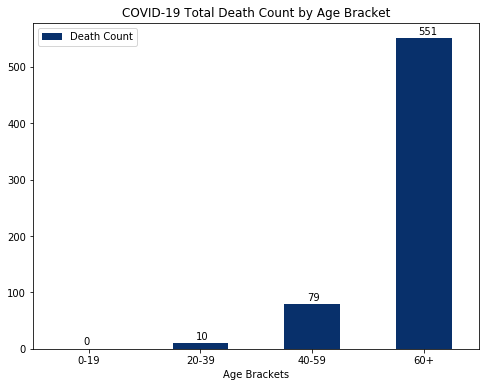

In [26]:
## Plotting total dead by age bracket
ax = total_death_by_age.plot(kind='bar',
                                      cmap='Blues_r',
                                      rot=0,
                                      figsize=(8,6), 
                                     title = 'COVID-19 Total Death Count by Age Bracket')
ax.set_xticklabels(['0-19', '20-39', '40-59', '60+']);
ax.set_xlabel('Age Brackets')

for idx, label in enumerate(PLOT_VALS):
    value = label
    ax.annotate(value,
                (idx, value),
                xytext=(-5, 4), 
                textcoords='offset points')

## *****NEED TO ADD TABLE NEXT TO CHART*****
plt.show()

### 6.2 

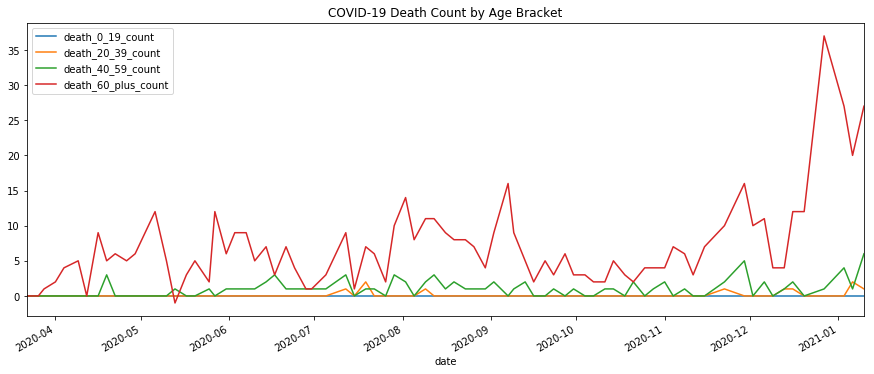

In [27]:
## Plotting covid-19 death count by age bracket throughout 2020
pt_death_ct_age = df.plot(x='date', 
                                 y=['death_0_19_count', 'death_20_39_count', 'death_40_59_count', 'death_60_plus_count'], 
                                 figsize=(15,6), 
                                 title='COVID-19 Death Count by Age Bracket')

<br>

### 6.3 Monthly Death Count by Age Bracket

In [28]:
## calculating monthly death count by age bracket

dead_monthly = df.resample('M', on='date')['death_0_19_count', 'death_20_39_count', 'death_40_59_count', 'death_60_plus_count'].sum()
dead_monthly

,death_0_19_count,death_20_39_count,death_40_59_count,death_60_plus_count
date,,,,
2020-03-31,0,0,0,1
2020-04-30,0,0,3,42
2020-05-31,0,0,3,44
2020-06-30,0,0,12,46
2020-07-31,0,3,9,38
2020-08-31,0,1,13,80
2020-09-30,0,0,7,58
2020-10-31,0,0,5,25
2020-11-30,0,1,10,53


[]

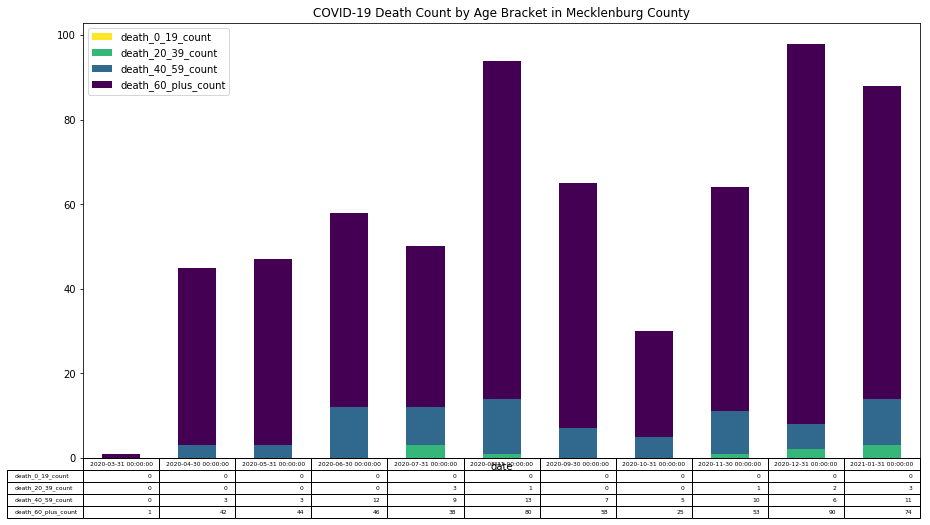

In [29]:
## Plotting  monthly Death count by age bracket 
## using cmap for changing colors in graphics. add '_r' to the end of the color to reverse palette
cmap = cm.get_cmap('Blues')
ax = dead_monthly.plot(kind='bar', 
                          figsize=(15,8),
                          cmap='viridis_r',
                          table=True,
                          width=0.5,
                          stacked=True,
                          title='COVID-19 Death Count by Age Bracket in Mecklenburg County')
ax.set_xticks([])

# ax.set_xticklabels(dead_monthly.index.strftime('%Y-%m'));
## *** NEED TO MAKE TABLE MORE READABLE ****

In [30]:
# stacked percentage chart
# https://python-graph-gallery.com/13-percent-stacked-barplot/



In [31]:
## Percent difference of 0-19

# diff_kernel = np.array([1,-1])
# np.convolve(df['0-19_new'],diff_kernel ,'same')

# df['0-9_new_diff'] = pd.Series(df['0-19_new'].values).diff(periods=1)

# np.convolve(df['death_0_19'], diff_kernel, 'same')
# df['death_0_19_diff'] = pd.Series(df['death_0_19'].values).diff(periods=1)

# np.convolve(df['death_60_plus'], diff_kernel, 'same')
# df['death_60_plus_diff'] = pd.Series(df['death_60_plus'].values).diff(periods=1)

<br><br><br>

### 7. Other Underlying Illness Conditions
---

In [32]:
## calculating no other illness count column
df['no_other_illness_count'] = pd.Series(df['no_other_ill_cum_count'].values).diff(periods=1).fillna(0).astype(int)
df[['date', 'no_other_ill_cum_count','no_other_illness_count']].tail()

## or?:
# np.convolve(df['no_other_ill_cum_count'], diff_kernel, 'same')

,date,no_other_ill_cum_count,no_other_illness_count
74,2020-12-20,8,0
75,2020-12-27,10,2
76,2021-01-03,13,3
77,2021-01-06,15,2
78,2021-01-10,16,1


In [33]:
## calculating the number of people that did die with other undelying illness conditions
# df[['death_count','no_other_illness_count']]
df['other_illness_count'] = df['death_count'] - df['no_other_illness_count']
df[['death_count','no_other_illness_count', 'other_illness_count']].tail()

,death_count,no_other_illness_count,other_illness_count
74,12,0,12
75,38,2,36
76,31,3,28
77,23,2,21
78,34,1,33


### 7.1 Monthly Deaths With and Without Underlying Illness Conditions

In [34]:
## calculating montly number for death count with underlying conditions
other_illness_monthly = df.resample('MS', on='date')['no_other_illness_count', 'other_illness_count'].sum()
other_illness_monthly

,no_other_illness_count,other_illness_count
date,,
2020-03-01,0,1
2020-04-01,0,45
2020-05-01,1,46
2020-06-01,1,57
2020-07-01,1,49
2020-08-01,0,94
2020-09-01,2,63
2020-10-01,0,30
2020-11-01,2,62


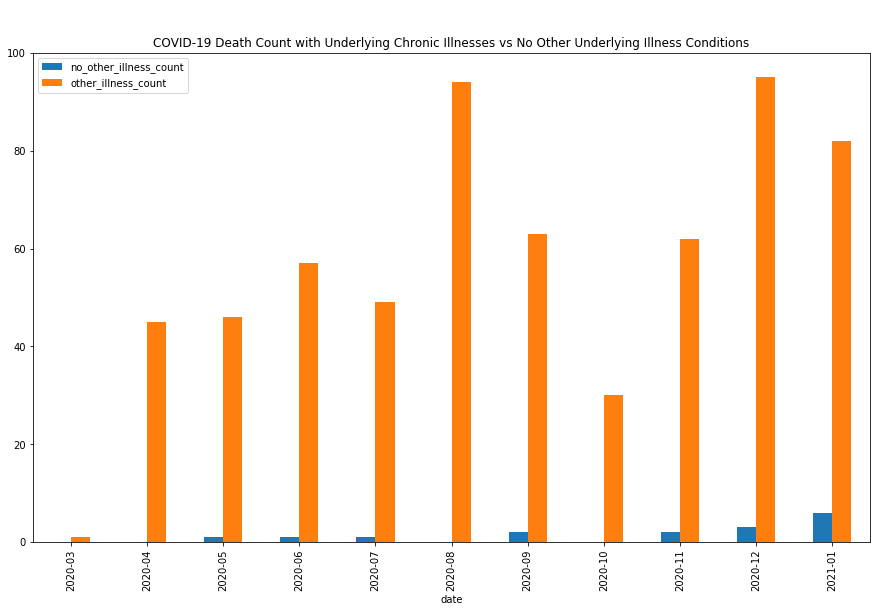

In [35]:
ax_other_illness = other_illness_monthly.plot(figsize=(15,9), 
                                              kind='bar',
                                              ylim=(0,100),
                                              title='\n\nCOVID-19 Death Count with Underlying Chronic Illnesses vs No Other Underlying Illness Conditions')
ax_other_illness.set_xticklabels(other_illness_monthly.index.strftime('%Y-%m'));

### 7.2 Total Death Percentage and Count With and Withouth Other Underlying Illness Conditions

In [36]:
## total count and total percentage of Death with and without other underlying illness conditions
# df[['no_other_illness_count', 'other_illness_count']].sum()
df['no_other_illness_pct'] = ((df['no_other_illness_count'] * 100)/df['death_count']).round(1).fillna(0)
df['other_illness_pct'] = ((df['other_illness_count'] * 100)/df['death_count']).round(1).fillna(0)
df[['death_count', 'no_other_illness_count','no_other_illness_pct', 'other_illness_pct']].head()


,death_count,no_other_illness_count,no_other_illness_pct,other_illness_pct
0,0,0,0.0,0.0
1,0,0,0.0,0.0
2,1,0,0.0,100.0
3,2,0,0.0,100.0
4,4,0,0.0,100.0


In [37]:
## creating a df for the totals
## total percentage death underlying illness

data = [{'count':df['no_other_illness_count'].sum(), 'percent':((df['no_other_illness_count'].sum() * 100)/df['death_count'].sum()).round(1)},
       {'count':df['other_illness_count'].sum(), 'percent':((df['other_illness_count'].sum() * 100)/df['death_count'].sum()).round(1)}]
total_death_illness = pd.DataFrame(data, index = ['no_other', 'other'])

total_death_illness

,count,percent
no_other,16,2.5
other,624,97.5


In [38]:
##**** NEED TO PLOT total_death_illness AS A TABLE NEXT TO THE CHART ABOVE*****  
# ax = total_death_illness.plot(figsize=(3,3))
# pd.plotting.table(ax, total_death_illness)